# Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read dataset
df=pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Variables:
Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

* Demographic: sex: male or female;(Nominal)

age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

 * Behavioural

currentSmoker: whether or not the patient is a current smoker (Nominal)

cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

* Medical( history):

BPMeds: whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

prevalentHyp: whether or not the patient was hypertensive (Nominal)

diabetes: whether or not the patient had diabetes (Nominal)

* Medical(current):

totChol: total cholesterol level (Continuous)

sysBP: systolic blood pressure (Continuous)

diaBP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

glucose: glucose level (Continuous)

* Predict variable (desired target):

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [3]:
df.rename(columns={'male':'Sex_male'}, inplace=True)

In [4]:
df.head()

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.isnull().sum()

Sex_male             0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.columns

Index(['Sex_male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
#dropout the eduction column  
df.drop(['education'], axis=1,inplace=True)

In [8]:
df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# EDA

C:\Users\SHUBHAM\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


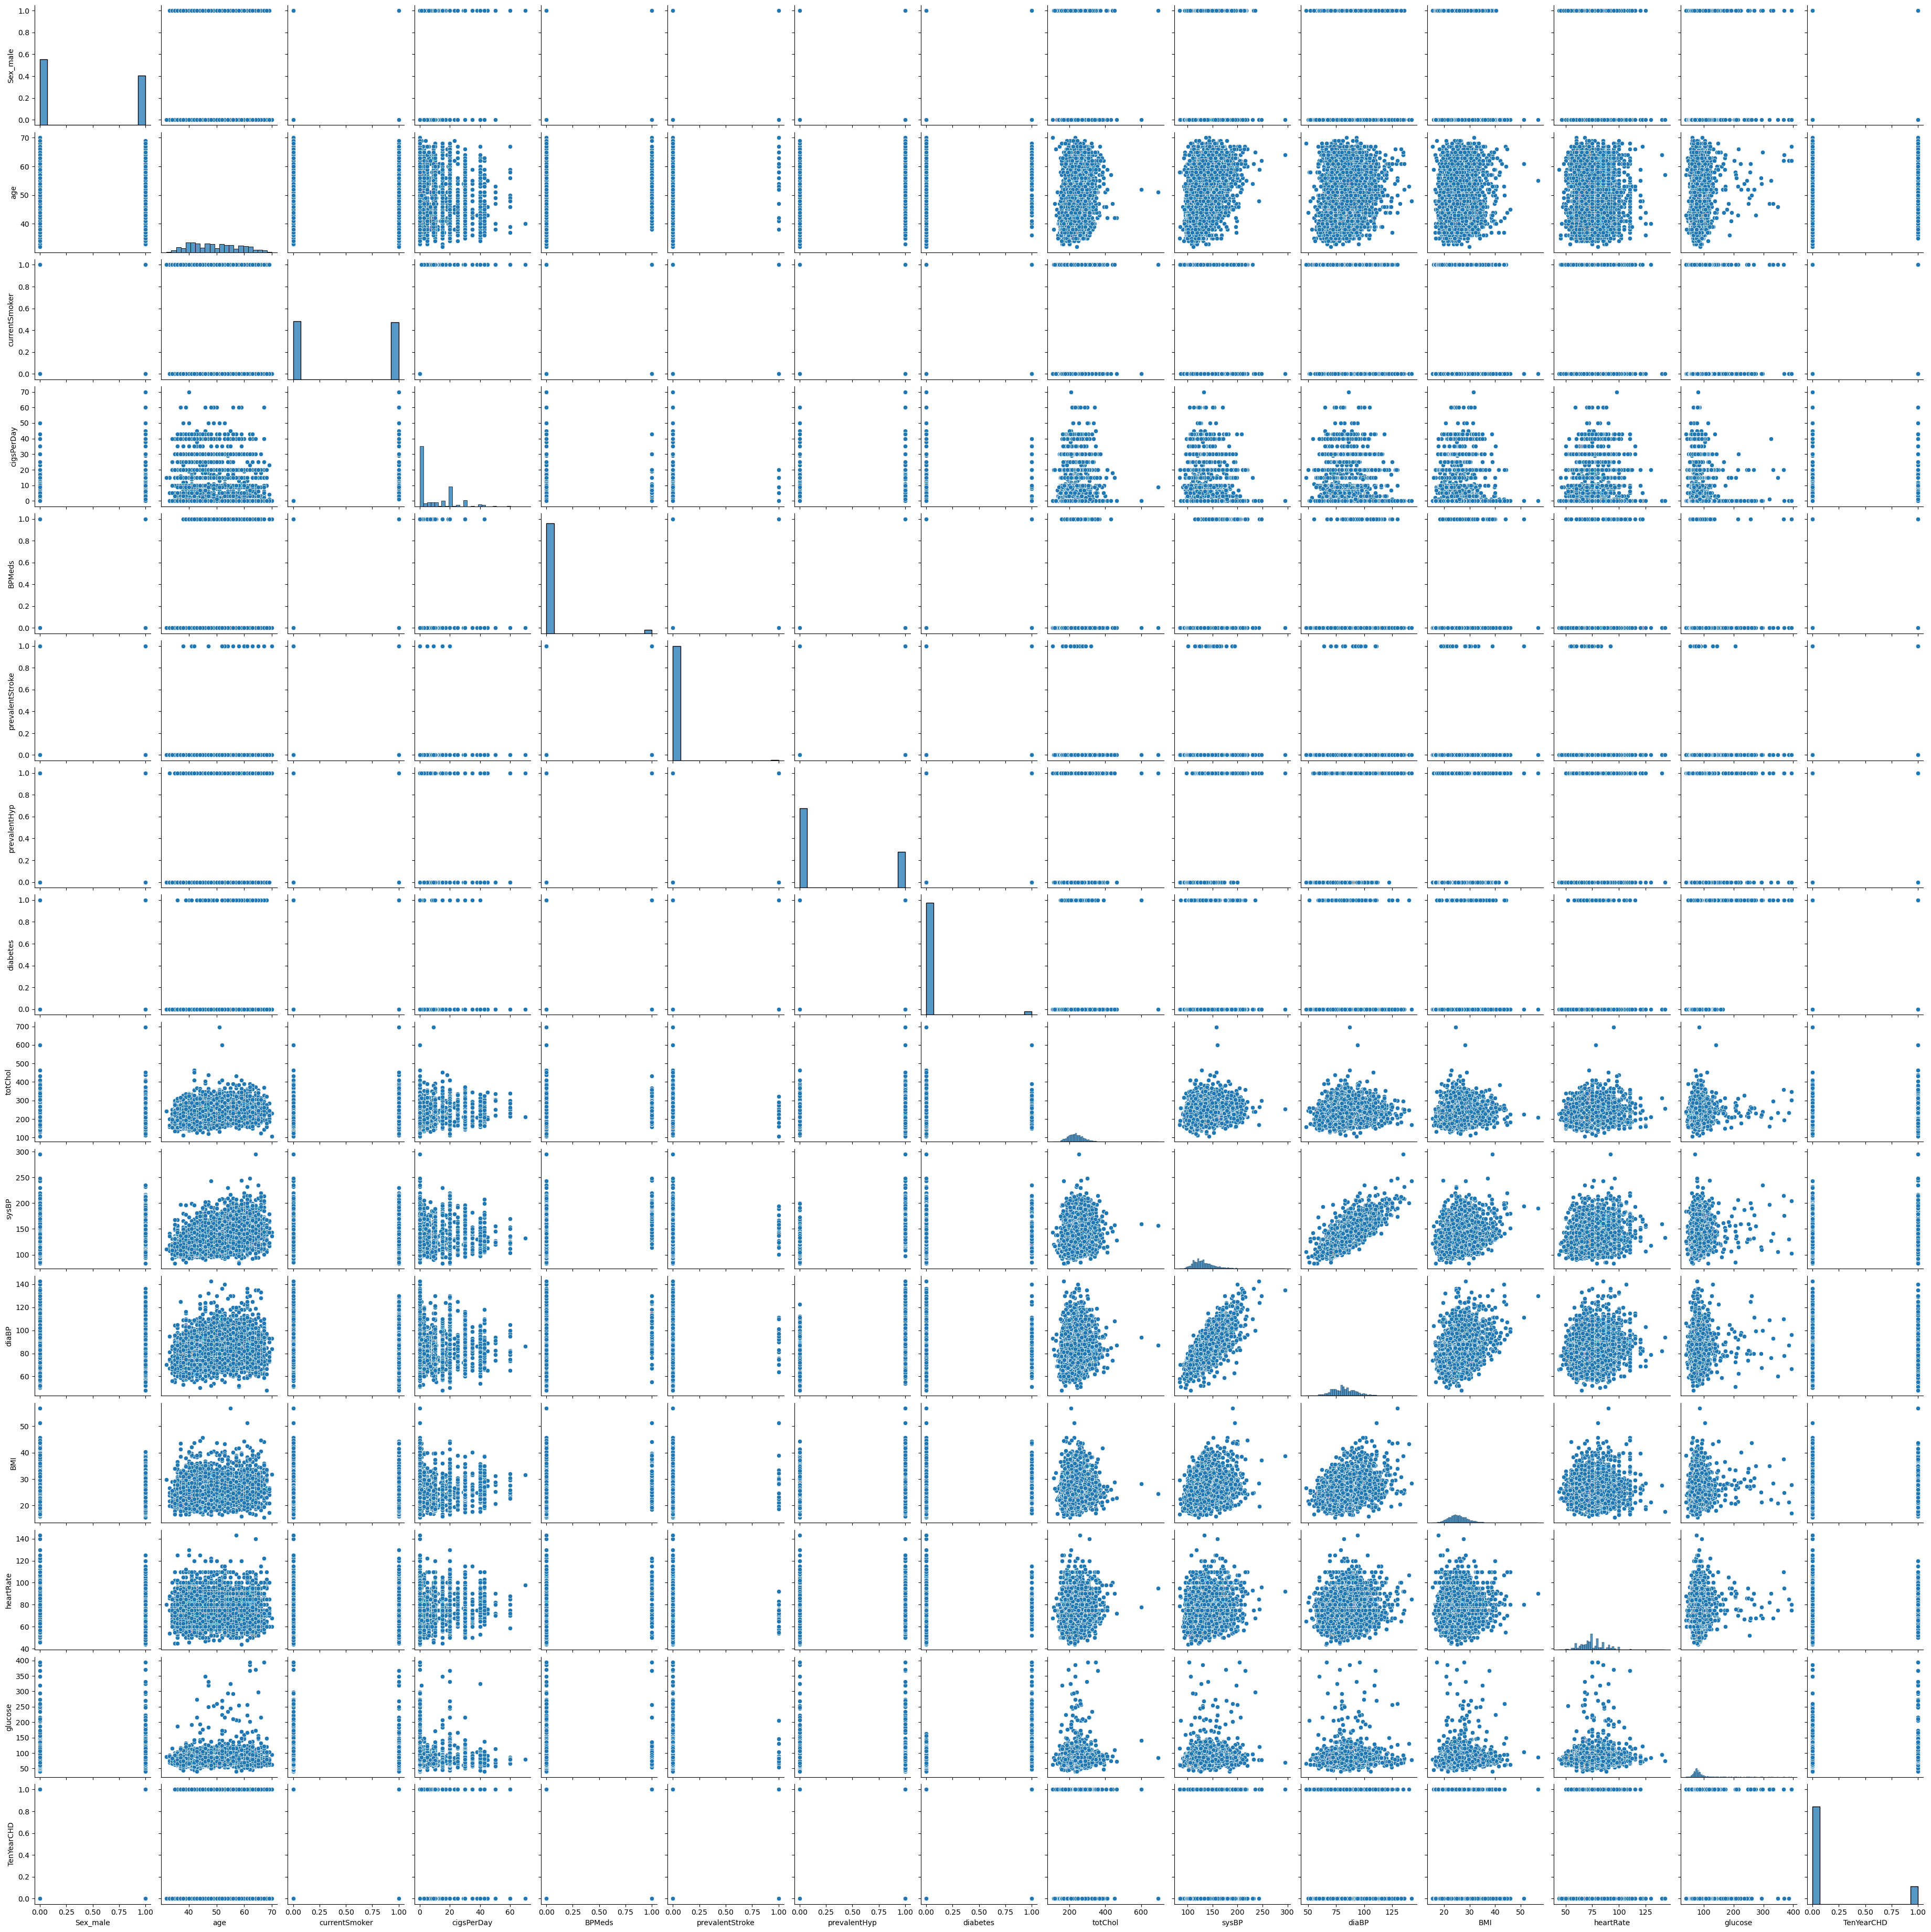

In [9]:
sns.pairplot(df)

<Axes: ylabel='Count'>

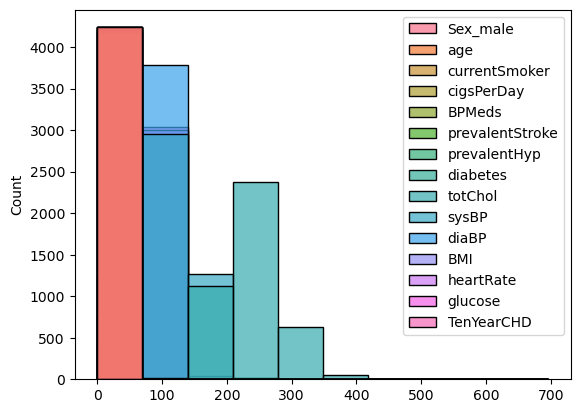

In [10]:
 sns.histplot(df, bins=10, color='b', alpha=0.7)

<Axes: xlabel='currentSmoker', ylabel='Count'>

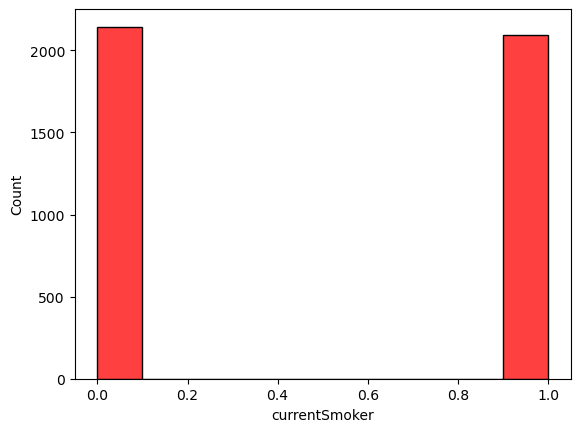

In [11]:
sns.histplot(df['currentSmoker'], bins=10,color='r')

In [12]:
df.columns

Index(['Sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<Axes: xlabel='Sex_male', ylabel='Count'>

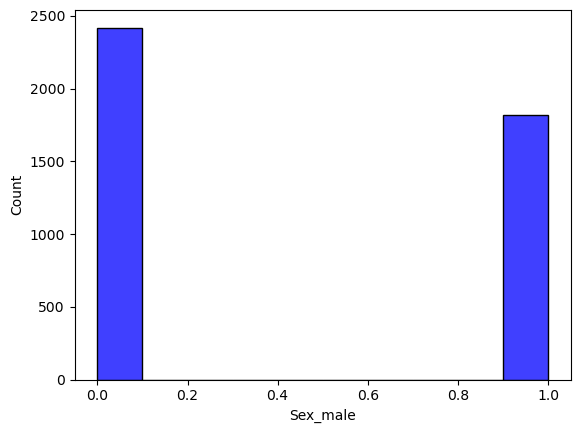

In [13]:
sns.histplot(df['Sex_male'], bins=10,color='b')

<Axes: xlabel='age', ylabel='Count'>

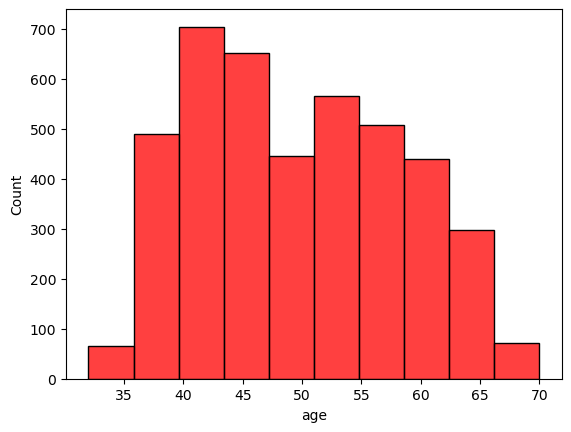

In [14]:
sns.histplot(df['age'], bins=10,color='r')

<Axes: xlabel='cigsPerDay', ylabel='Count'>

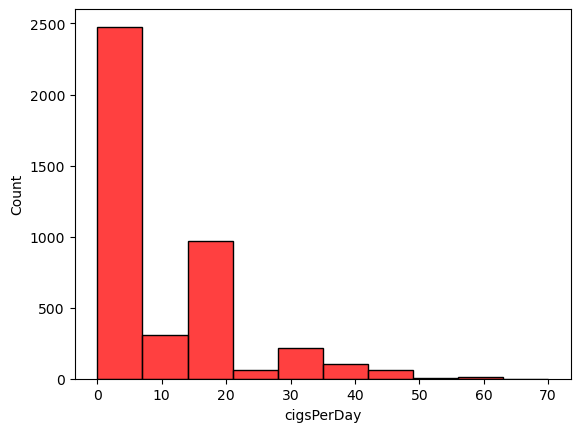

In [15]:
sns.histplot(df['cigsPerDay'], bins=10,color='r')

<Axes: xlabel='BPMeds', ylabel='Count'>

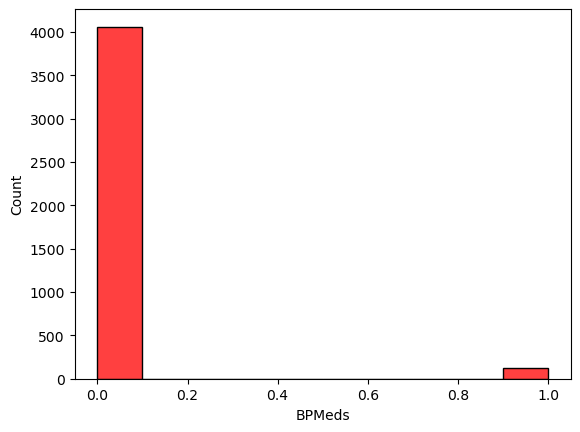

In [16]:
sns.histplot(df['BPMeds'], bins=10,color='r')

<Axes: xlabel='prevalentStroke', ylabel='Count'>

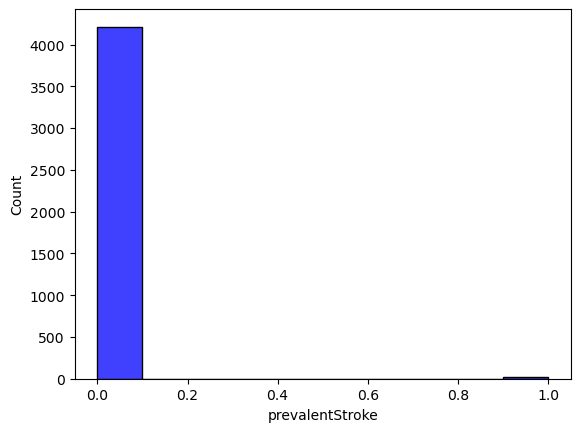

In [17]:
sns.histplot(df['prevalentStroke'],bins=10,color='b')

In [18]:
count=0
for i in df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of roes wtih missing values is', count)
print('since it is only', round((count/len(df.index))*100),'percentage of the entire dataset thre rows with missing values are excluded')
        



Total number of roes wtih missing values is 489
since it is only 12 percentage of the entire dataset thre rows with missing values are excluded


In [19]:
# Removing all the rows with null values
df.dropna(axis=0, inplace=True)

In [20]:
df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


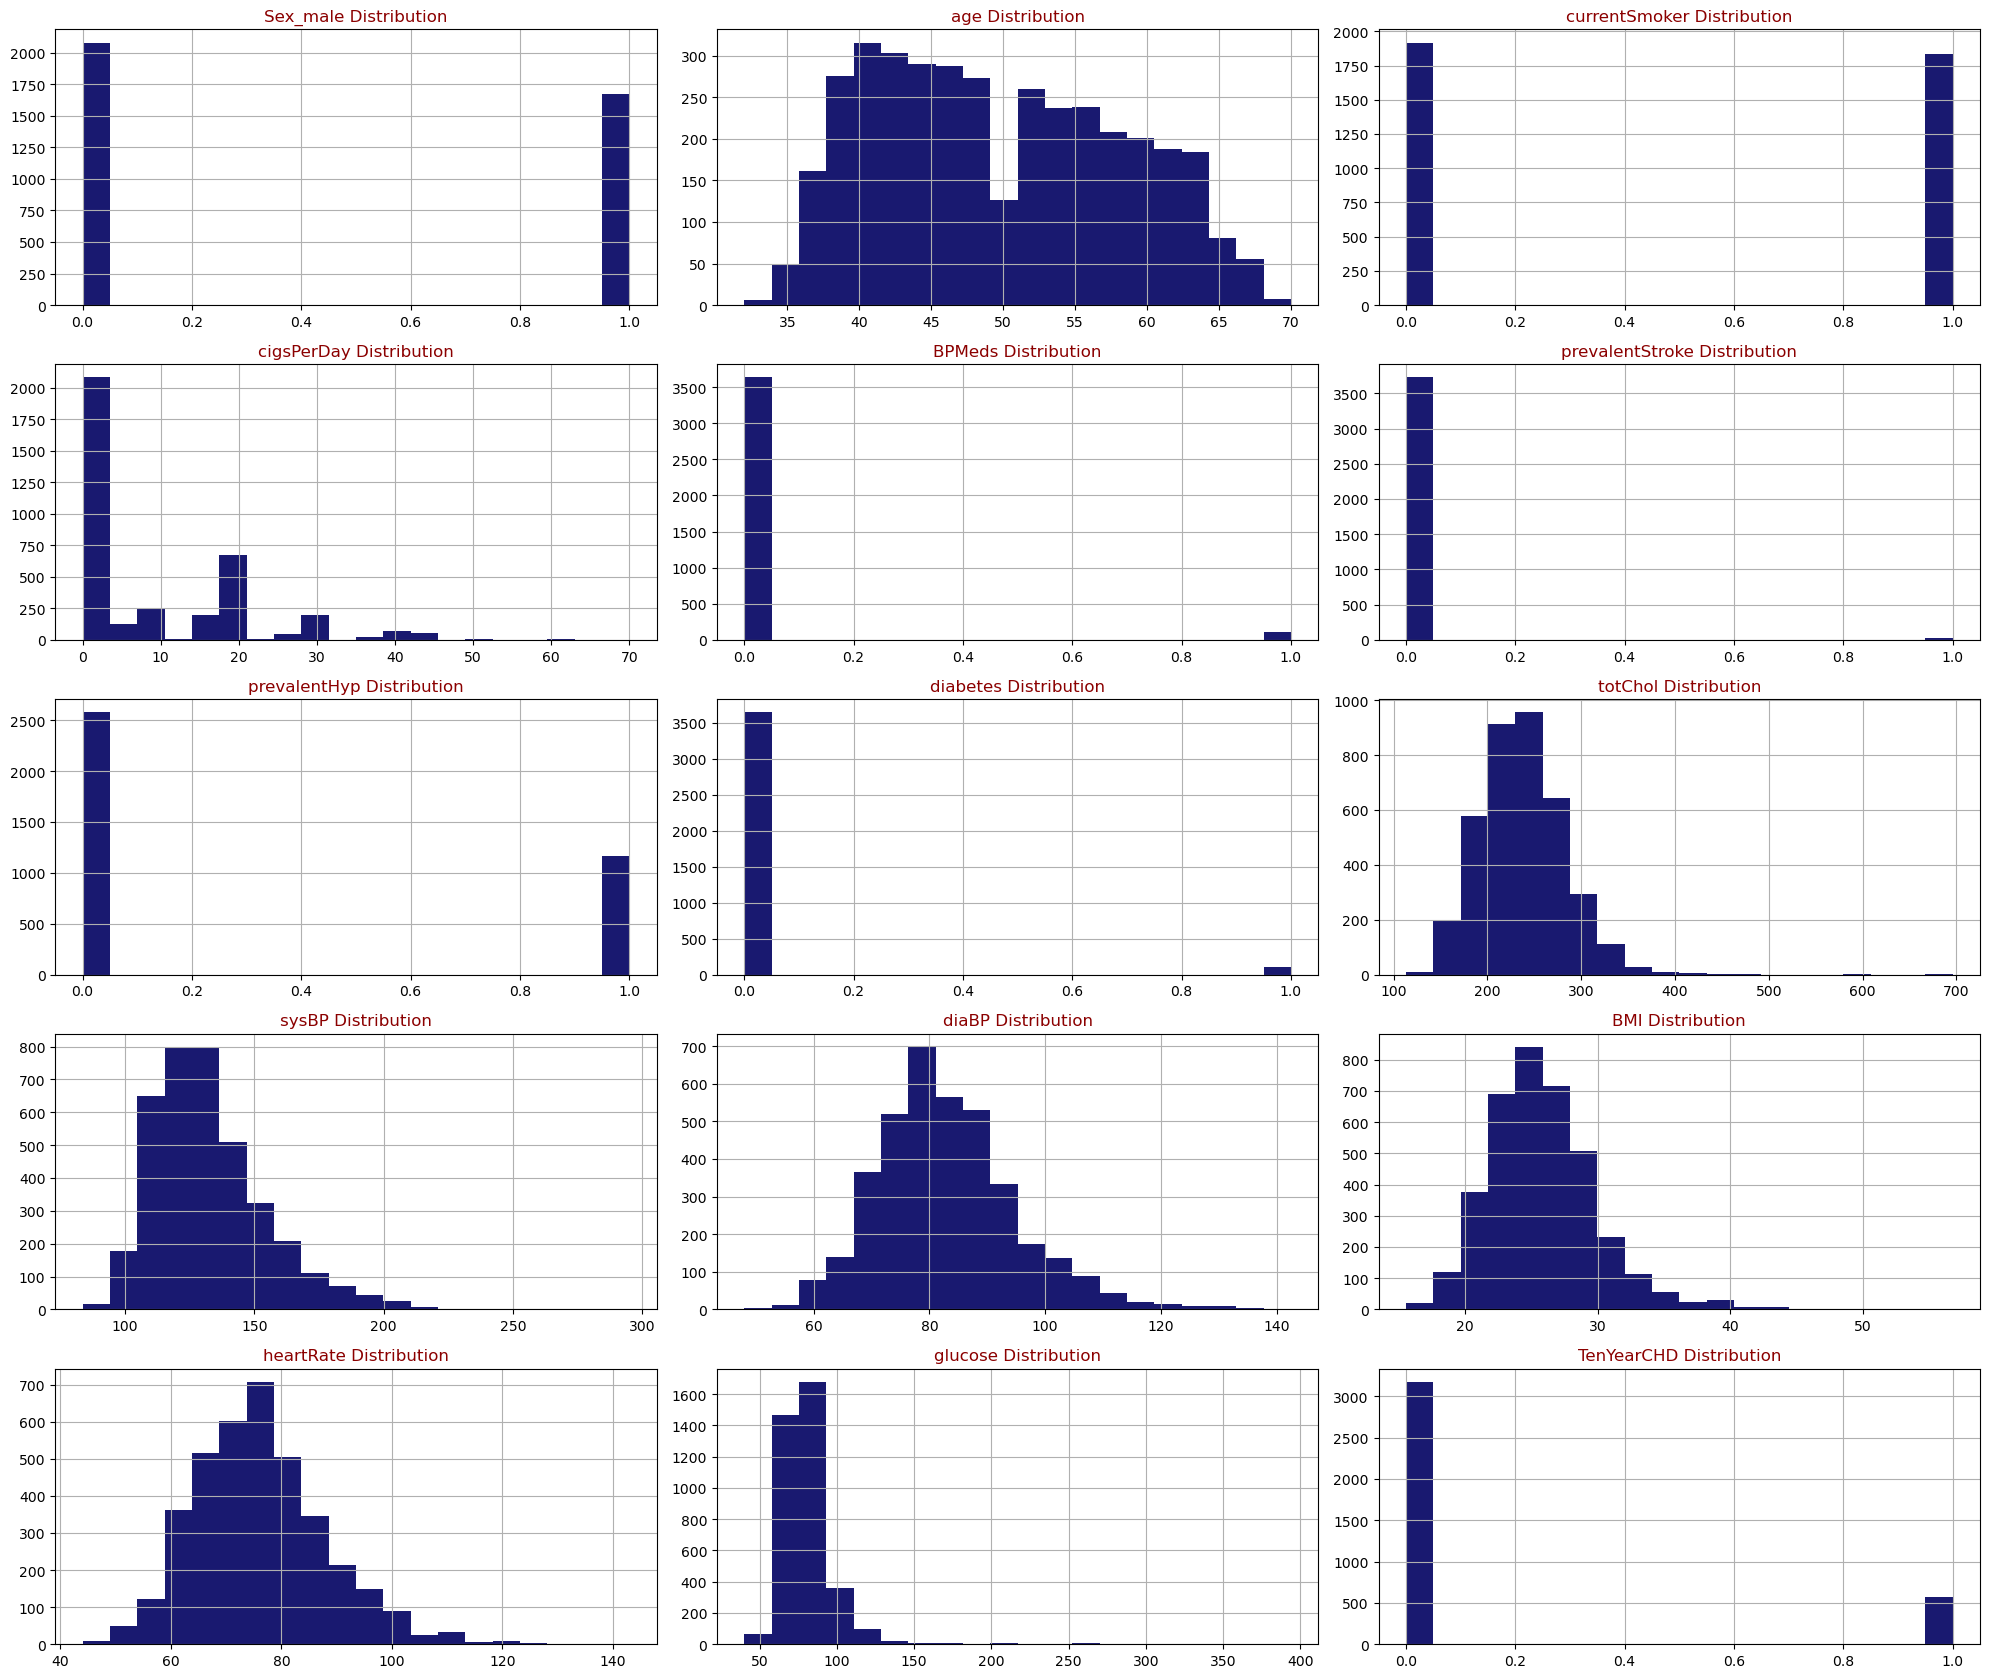

In [21]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)
        

In [22]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3177
1     572
Name: count, dtype: int64

<Axes: xlabel='TenYearCHD', ylabel='count'>

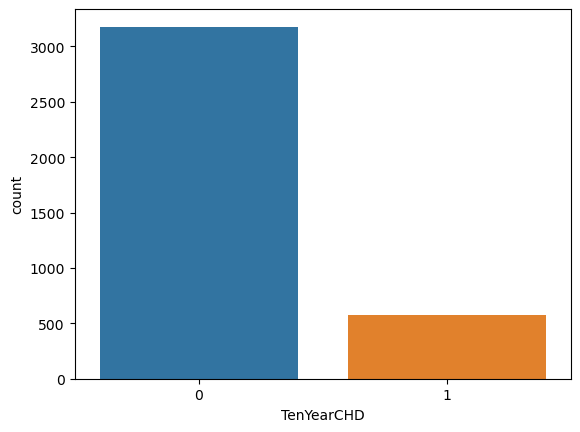

In [23]:
sns.countplot(x='TenYearCHD',data=df)

@ There are 3179 are patients with no heart disease and 572 patients with risk of heart disease

In [24]:
df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Logistic Regression
Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success.


In [25]:
df.head()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3749 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         3749 non-null   int64  
 1   age              3749 non-null   int64  
 2   currentSmoker    3749 non-null   int64  
 3   cigsPerDay       3749 non-null   float64
 4   BPMeds           3749 non-null   float64
 5   prevalentStroke  3749 non-null   int64  
 6   prevalentHyp     3749 non-null   int64  
 7   diabetes         3749 non-null   int64  
 8   totChol          3749 non-null   float64
 9   sysBP            3749 non-null   float64
 10  diaBP            3749 non-null   float64
 11  BMI              3749 non-null   float64
 12  heartRate        3749 non-null   float64
 13  glucose          3749 non-null   float64
 14  TenYearCHD       3749 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.6 KB


In [49]:
X=df.iloc[:,:14].values
y=df.iloc[:,[14]].values

In [50]:
X

array([[  1.  ,  39.  ,   0.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   0.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  1.  ,  50.  ,   1.  , ...,  25.97,  66.  ,  86.  ],
       [  1.  ,  51.  ,   1.  , ...,  19.71,  65.  ,  68.  ],
       [  0.  ,  52.  ,   0.  , ...,  21.47,  80.  , 107.  ]])

In [51]:
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [52]:
X.size

52486

In [53]:
y.size

3749

In [54]:
X.shape

(3749, 14)

In [55]:
y.shape

(3749, 1)

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

In [57]:
X_train

array([[ 0.  , 55.  ,  1.  , ..., 19.5 , 79.  , 75.  ],
       [ 0.  , 45.  ,  0.  , ..., 23.46, 85.  , 90.  ],
       [ 1.  , 51.  ,  1.  , ..., 22.34, 75.  , 74.  ],
       ...,
       [ 0.  , 39.  ,  0.  , ..., 22.85, 60.  , 88.  ],
       [ 0.  , 64.  ,  0.  , ..., 23.33, 82.  , 87.  ],
       [ 1.  , 56.  ,  0.  , ..., 28.41, 60.  , 88.  ]])

In [58]:
X_train.shape

(2999, 14)

In [59]:
y_train.shape

(2999, 1)

In [60]:
X_test.shape

(750, 14)

In [61]:
y_test.shape

(750, 1)

In [62]:
y_train

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [66]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)

In [67]:
X_train.shape

(2999, 14)

In [68]:
X_train

array([[-0.89147837,  0.62029666,  1.02669839, ..., -1.55048532,
         0.27878843, -0.29126643],
       [-0.89147837, -0.54157311, -0.97399588, ..., -0.57884695,
         0.78321468,  0.35750661],
       [ 1.1217322 ,  0.15554875,  1.02669839, ..., -0.85365376,
        -0.05749573, -0.33451796],
       ...,
       [-0.89147837, -1.23869496, -0.97399588, ..., -0.72851851,
        -1.31856136,  0.27100354],
       [-0.89147837,  1.66597945, -0.97399588, ..., -0.61074417,
         0.53100156,  0.227752  ],
       [ 1.1217322 ,  0.73648363, -0.97399588, ...,  0.63570102,
        -1.31856136,  0.27100354]])

In [69]:
# Fitting the logistic Regression model into training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

C:\Users\SHUBHAM\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [70]:
y_pred=classifier.predict(X_test)

In [71]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# Making the confusion matrix 
This matrix contain the  correct prediction or incorrect prediction that our model needs

In [72]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test ,y_pred)

In [73]:
cm

array([[644,   3],
       [ 93,  10]], dtype=int64)

NameError: name 'labels' is not defined

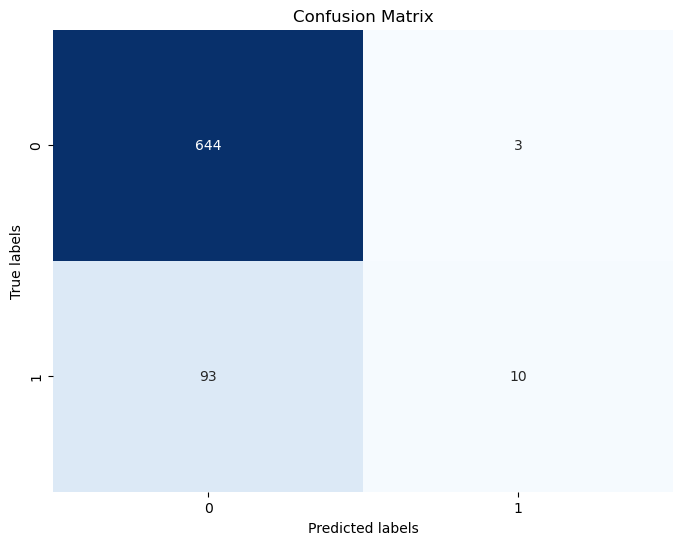

In [77]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(labels)) + 0.5, labels)
plt.yticks(np.arange(len(labels)) + 0.5, labels)
plt.show()

@ The confusion matrix shows 644+10 = 654 correct predictions and 93+3= 96 incorrect ones.

True Positives: 4

True Negatives: 658

False Positives: 1 (Type I error)

False Negatives: 88 ( Type II error)

In [81]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

In [83]:
accuracy

0.872